## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [8]:
import numpy as np
import random

def lancia_moneta(n):
  c = []
  for i in range(n):
    c.append(random.randint(0,1))
  c = np.array(c)
  return len(c[c==1]) / len(c)

In [9]:
a=[lancia_moneta(i) for i in range(10,20000,200)]
a,len(a)

([0.5,
  0.5285714285714286,
  0.4268292682926829,
  0.48360655737704916,
  0.49382716049382713,
  0.5178217821782178,
  0.47107438016528924,
  0.500709219858156,
  0.5055900621118012,
  0.4994475138121547,
  0.47960199004975124,
  0.49276018099547514,
  0.504149377593361,
  0.48582375478927203,
  0.500355871886121,
  0.4973421926910299,
  0.4981308411214953,
  0.5026392961876833,
  0.4903047091412742,
  0.5010498687664042,
  0.49800498753117206,
  0.5068883610451307,
  0.5047619047619047,
  0.4982646420824295,
  0.5014553014553015,
  0.5219560878243513,
  0.5126679462571977,
  0.5033271719038817,
  0.5106951871657754,
  0.5072289156626506,
  0.4983361064891847,
  0.5096618357487923,
  0.5015600624024961,
  0.5043872919818457,
  0.49544787077826724,
  0.4875891583452211,
  0.5016643550624134,
  0.49298245614035086,
  0.4923784494086728,
  0.5037131882202305,
  0.49962546816479403,
  0.5097442143727162,
  0.5048751486325802,
  0.5037166085946574,
  0.5118047673098751,
  0.49933407325194

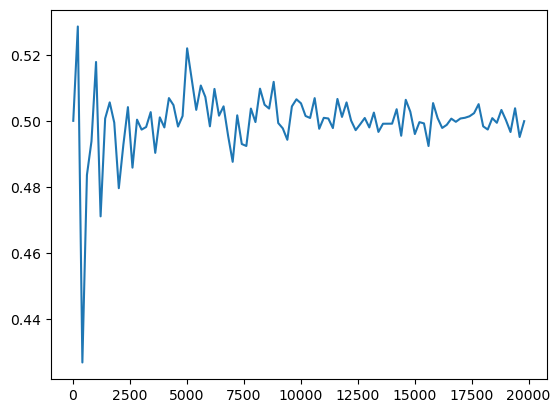

In [10]:
import matplotlib.pyplot as plt

ind = [i for i in range(10,20000,200)]

plt.plot(ind,a)


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

C:\Users\user\AppData\Local\Temp\ipykernel_15876\427096662.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df.Embarked.mode()[0],inplace=True)


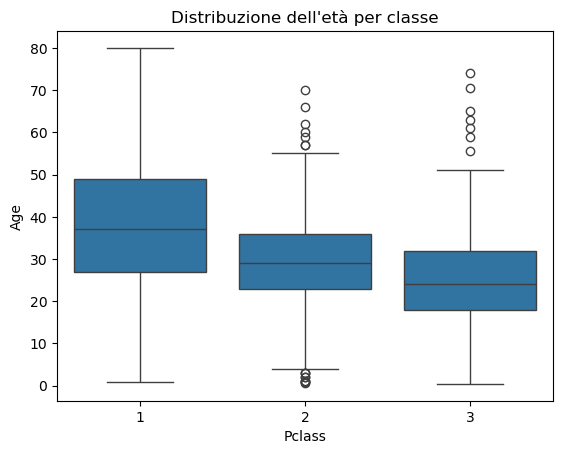

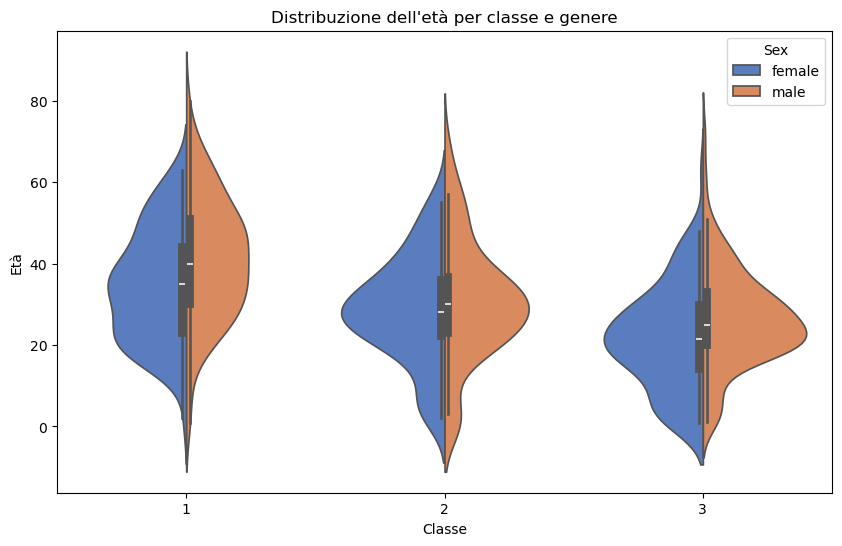

(12,
 714,
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 529, 0],
 array([38.23344086, 29.87763006, 25.14061972]))

In [16]:
# 📦 Caricamento del dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
c=[]
for each in df.keys():
  a=np.array(df[each].isna())
  c.append(len(a[a==True]))
df["Embarked"].fillna(df.Embarked.mode()[0],inplace=True)
df.dropna(subset=["Age"],inplace=True)
df.drop_duplicates(inplace=True)
c=[]
for each in df.keys():
  a=np.array(df[each].isna())
  c.append(len(a[a==True]))
medie=np.array([np.mean(df.Age[df.Pclass==i]) for i in range(1,4)])
sns.boxplot(df,x="Pclass",y="Age")
plt.title("Distribuzione dell'età per classe")
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', split=True, palette="muted")
plt.title("Distribuzione dell'età per classe e genere")
plt.xlabel("Classe")
plt.ylabel("Età")
plt.show()
len(df.keys()),len(df),c,medie

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df["species"].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [22]:
df.groupby("species")[["petal_length","petal_width"]].mean()

,petal_length,petal_width
species,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


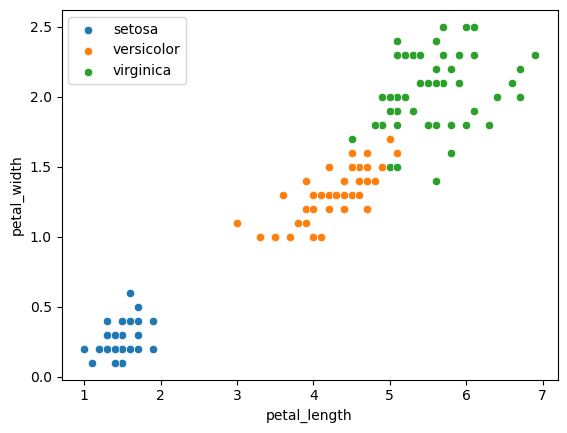

In [28]:
dfse = df[df["species"] == "setosa"]
dfve = df[df["species"] == "versicolor"]
dfvi = df[df["species"] == "virginica"]
sns.scatterplot(dfse, x="petal_length", y="petal_width", label="setosa")
sns.scatterplot(dfve, x="petal_length", y="petal_width", label="versicolor")
sns.scatterplot(dfvi, x="petal_length", y="petal_width", label="virginica")
plt.legend()

In [31]:
df["petal_area"]=df.petal_length*df.petal_width
df.petal_area.describe()

count    150.000000
mean       5.794067
std        4.712390
min        0.110000
25%        0.420000
50%        5.615000
75%        9.690000
max       15.870000
Name: petal_area, dtype: float64

Text(0.5, 1.0, 'Distribuzione area petalo per specie')

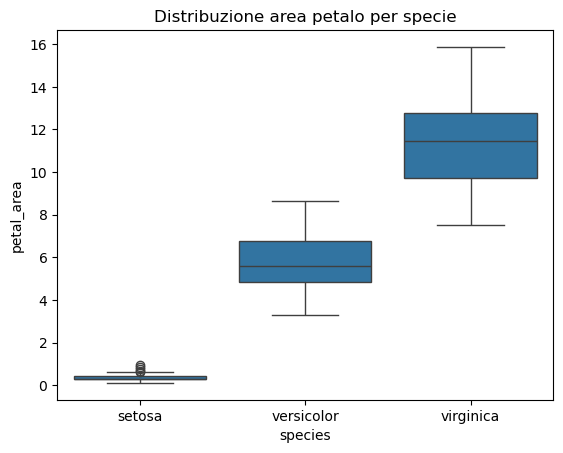

In [33]:
sns.boxplot(df,x="species",y="petal_area")
plt.title("Distribuzione area petalo per specie")